# Sprint
## 機械学習スクラッチ 線形回帰
スクラッチで線形回帰を実装した後、学習と検証を行なっていきます。

線形回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。

以下に雛形を用意してあります。このScratchLinearRegressionクラスにコードを書き加えていってください。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# ここにいろいろ実装していく
class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, no_bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.no_bias = no_bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # preparing
        ## check bias 
        X_biased = self._check_bias(X)
        ## check val_bias
        if X_val is not None:
            X_val_biased = self._check_bias(X_val)

        ## initial theta = [[0], [0], ..., [0]]
        self.theta = np.random.randn(X_biased.shape[1], 1)


        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print('start learning with process')

        # loop learning
        for i in range(self.iter):
            ## calc hypothesis
            hypothesis = self._linear_hypothesis(X_biased)

            ## add loss
            self.loss[i] = get_loss(hypothesis, y)

            ## calc error
            error = self._get_error(hypothesis, y)

            ## gradient descent
            self.theta = self._gradient_descent(X_biased, error)

            ## validation
            if (X_val is not None) and (y_val is not None):
                ## calc val_hypothesis
                val_hypothesis = self._linear_hypothesis(X_val_biased)

                ### add val_loss
                self.val_loss[i] = get_loss(val_hypothesis, y_val)
            
            ## output process
            if self.verbose:
                print(f'{i+1}th loop')
                print(f'loss : train: {self.loss[i]}, valid: {self.val_loss[i]}')
                print(f'MSE  : train: {MSE(hypothesis, y)}, valid: {MSE(val_hypothesis, y_val)}')
            
        print('Done!')

    def predict(self, X):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """        
        # preparing
        ## check bias 
        X_biased = self._check_bias(X)

        # predict y
        pred = self._linear_hypothesis(X_biased)
        
        return pred

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形の仮定関数による推定結果

        """
        # calc
        h = np.matmul(X, self.theta)
    
        return h

    def _gradient_descent(self, X, error):
        """
        パラメータベクトルの値を更新する

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データ
        error : 次の形のndarray, shape (n_samples, 1)
            予測値と正解値の差

        Returns
        -------
        theta_new: 次の形のndarray, shape (n_samples, 1)
            更新された新たなパラメータベクトル
        """
        # m : number of samples
        m = X.shape[0]

        # predict
        theta_new = self.theta - (self.lr * np.matmul(X.T, error))/m

        return theta_new
    
    def _get_error(self, hypothesis, y):
        """
        誤差ベクトルを求める

        Parameters
        ----------
        hypothesis : 次の形のndarray, shape (n_samples, 1)
            予測値ベクトル
        y : 次の形のndarray, shape (n_samples, 1)
            パラメータベクトル

        Returns
        -------
        error: 次の形のndarray, shape (n_samples, 1)
            誤差ベクトル
        """
        error = hypothesis - y

        return error
    
    def _check_bias(self, v):
        """
        no_biasフラグに従い、ベクトルにバイアス項を追加したりしなかったりする

        Parameters
        ----------
        v : 次の形のndarray, shape (*, n_features)
            ベクトル

        Returns
        ----------
        v_biased : 次の形のndarray, shape (*, n_features+1)
            バイアス項を追加したりしなかったりしたベクトル
        """
        m = v.shape[0]

        if not self.no_bias:
            v_biased = np.concatenate((np.ones((m, 1)), v), axis=1)
        else:
            v_biased = v

        return v_biased

# 【問題1】
## 仮定関数
以下の数式で表される線形回帰の仮定関数を実装してください。メソッドの雛形を用意してあります。
$$
h_\theta(x) =  \theta_0 x_0 + \theta_1 x_1 + ... + \theta_j x_j + ... +\theta_n x_n.   (x_0 = 1)\\
$$
### 雛形
クラスの外から呼び出すことがないメソッドのため、Pythonの慣例としてアンダースコアを先頭にひとつつけています。
```python
def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    pass
    return
```

# 【問題2】
## 最急降下法
最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fit
メソッドから呼び出すようにしてください。
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$
### 雛形
ScratchLinearRegressionクラスへ以下のメソッドを追加してください。コメントアウト部分の説明も記述してください。
```python
def _gradient_descent(self, X, error):
    """
    説明を記述
    """
    pass
```
雛形として用意されたメソッドや関数以外でも必要があれば各自作成して完成させてください。雛形を外れても問題ありません。

# 【問題3】
## 推定
推定する仕組みを実装してください。ScratchLinearRegressionクラスの雛形に含まれるpredictメソッドに書き加えてください。

仮定関数hθ(x)の出力が推定結果です。

# 【問題4】
## 平均二乗誤差
線形回帰の指標値として用いられる平均二乗誤差（mean square error, MSE）の関数を作成してください。

平均二乗誤差関数は回帰問題全般で使える関数のため、ScratchLinearRegressionクラスのメソッドではなく、 **別の関数として作成してください。** 雛形を用意してあります。

平均二乗誤差は以下の数式で表されます。
$$
L(\theta)=  \frac{1 }{ m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$
なお、最急降下法のための目的関数（損失関数）としては、これを2で割ったものを使用します。（問題5, 9）

### 雛形
```python
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
      推定した値
    y : 次の形のndarray, shape (n_samples,)
      正解値

    Returns
    ----------
    mse : numpy.float
      平均二乗誤差
    """
    pass
    return mse
```

In [3]:
def MSE(y_pred, y):
    """
    平均二乗誤差の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
    y : 次の形のndarray, shape (n_samples,)
        正解値

    Returns
    ----------
    mse : numpy.float
        平均二乗誤差
    """
    # m : number of samples
    m = y.shape[0]

    error = y_pred - y

    mse = np.sum(error**2)/m

    return mse

# 【問題5】
## 目的関数
以下の数式で表される線形回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。

目的関数（損失関数） J(θ)は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

In [4]:
def get_loss(y_pred, y):
    """
    目的関数（損失関数）の計算

    Parameters
    ----------
    y_pred : 次の形のndarray, shape (n_samples,)
        推定した値
    y : 次の形のndarray, shape (n_samples,)
        正解値

    Returns
    ----------
    loss : numpy.float
        目的関数（損失関数）
    """
    mse = MSE(y_pred, y)

    loss = mse/2

    return loss

# 【問題6】
## 学習と推定
機械学習スクラッチ入門のSprintで用意したHouse Pricesコンペティションのデータに対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

In [5]:
train_df = pd.read_csv('train.csv')

display(train_df)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
from sklearn.model_selection import train_test_split

# 分割
X_df = train_df.iloc[:, 1:-1]
y = train_df['SalePrice'].values.reshape(-1, 1)

X_df_train, X_df_val, y_train, y_val = train_test_split(X_df, y)

In [7]:
# 数値型の列のみ抽出
X_df_num = X_df.select_dtypes(include='number')
display(X_df_num)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


In [8]:
# 欠損値処理
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

X_df_num.info()
print(X_df_num.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

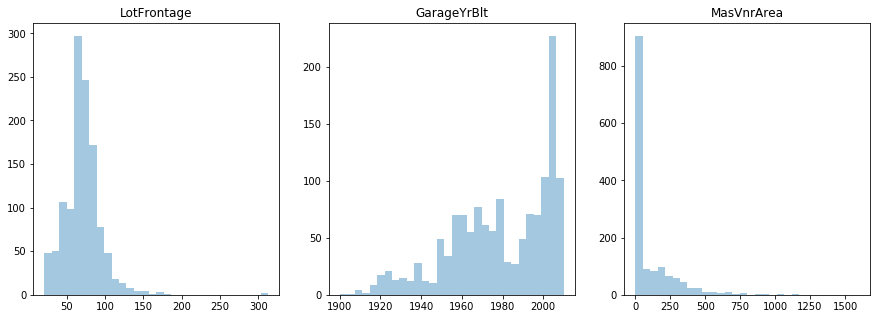

,LotFrontage,GarageYrBlt,MasVnrArea
count,1201.000000,1379.000000,1452.000000
mean,70.049958,1978.506164,103.685262
std,24.284752,24.689725,181.066207
min,21.000000,1900.000000,0.000000
25%,59.000000,1961.000000,0.000000
50%,69.000000,1980.000000,0.000000
75%,80.000000,2002.000000,166.000000
max,313.000000,2010.000000,1600.000000


In [9]:
# 欠損値が存在する列をプロット
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax1 = sns.distplot(X_df['LotFrontage'].values, kde=False, bins=30, label='LotFrontage')
ax1.set_title('LotFrontage')

ax2 = fig.add_subplot(132)
ax2 = sns.distplot(X_df['GarageYrBlt'].values, kde=False, bins=30, label='GarageYrBlt')
ax2.set_title('GarageYrBlt')

ax3 = fig.add_subplot(133)
ax3 = sns.distplot(X_df['MasVnrArea'].values, kde=False, bins=30, label='MasVnrArea')
ax3.set_title('MasVnrArea')

plt.show()

X_df[['LotFrontage', 'GarageYrBlt', 'MasVnrArea']].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1460.000000
mean       70.306164
std        23.945565
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1460.000000
mean       70.104795
std        23.846996
min        21.000000
25%        59.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


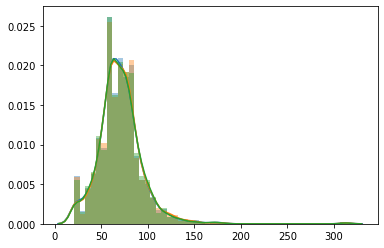

In [10]:
# LotFrontage
print(X_df['LotFrontage'].describe())
print(X_df['LotFrontage'].fillna(method = 'bfill').describe())
print(X_df['LotFrontage'].fillna(method = 'ffill').describe())

sns.distplot(X_df['LotFrontage'].values)
sns.distplot(X_df['LotFrontage'].fillna(method = 'bfill').values)
sns.distplot(X_df['LotFrontage'].fillna(method = 'ffill').values)

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean     1978.217123
std        24.716517
min      1900.000000
25%      1961.000000
50%      1979.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean     1978.543836
std        24.815152
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


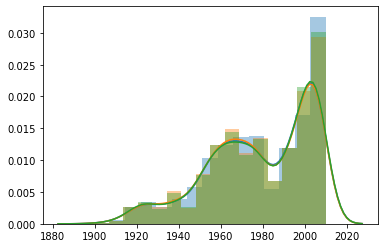

In [11]:
# GarageYrBlt
print(X_df['GarageYrBlt'].describe())
print(X_df['GarageYrBlt'].fillna(method = 'bfill').describe())
print(X_df['GarageYrBlt'].fillna(method = 'ffill').describe())

sns.distplot(X_df['GarageYrBlt'].values)
sns.distplot(X_df['GarageYrBlt'].fillna(method = 'bfill').values)
sns.distplot(X_df['GarageYrBlt'].fillna(method = 'ffill').values)

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count    1460.000000
mean      103.680822
std       181.190771
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count    1460.000000
mean      103.492466
std       180.795612
min         0.000000
25%         0.000000
50%         0.000000
75%       165.250000
max      1600.000000
Name: MasVnrArea, dtype: float64


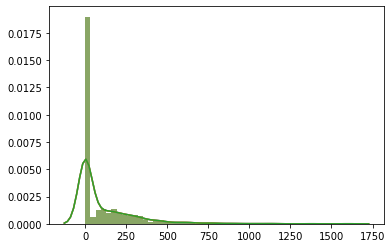

In [12]:
# MasVnrArea
print(X_df['MasVnrArea'].describe())
print(X_df['MasVnrArea'].fillna(method = 'bfill').describe())
print(X_df['MasVnrArea'].fillna(method = 'ffill').describe())

sns.distplot(X_df['MasVnrArea'].values)
sns.distplot(X_df['MasVnrArea'].fillna(method = 'bfill').values)
sns.distplot(X_df['MasVnrArea'].fillna(method = 'ffill').values)

In [13]:
# bfillのほうがやや影響少なそう
# df.fillna(method = 'bfill').fillna(method = 'ffill')
## trainに適用
from sklearn.preprocessing import StandardScaler

### 欠損値処理
X_df_train_filled = X_df_train.select_dtypes(include='number').fillna(method = 'bfill').fillna(method = 'ffill')
print(X_df_train_filled.isnull().sum().sort_values(ascending=False))
X_train = X_df_train_filled.values

### 標準化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)

YrSold           0
MoSold           0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
HalfBath         0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
MSSubClass       0
dtype: int64


In [14]:
## validation
### 欠損値処理
X_df_val_filled = X_df_val.select_dtypes(include='number').fillna(method = 'bfill').fillna(method = 'ffill')
print(X_df_val_filled.isnull().sum().sort_values(ascending=False))
X_val = X_df_val_filled.values

### 標準化
X_val_new = scaler.transform(X_val)

YrSold           0
MoSold           0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
TotalBsmtSF      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
MasVnrArea       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
LotFrontage      0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
WoodDeckSF       0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
GarageArea       0
HalfBath         0
GarageCars       0
GarageYrBlt      0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
BedroomAbvGr     0
MSSubClass       0
dtype: int64


In [15]:
# 学習
reg = ScratchLinearRegression(num_iter=1000, lr=0.01, no_bias=False, verbose=True)
reg.fit(X_train_new, y_train, X_val_new, y_val)

train: 587298705.6032511, valid: 643286809.1630384
MSE  : train: 1174597411.2065022, valid: 1286573618.3260767
846th loop
loss : train: 587292370.4188794, valid: 643286968.9999695
MSE  : train: 1174584740.8377588, valid: 1286573937.999939
847th loop
loss : train: 587286059.3853166, valid: 643287162.4186407
MSE  : train: 1174572118.7706332, valid: 1286574324.8372815
848th loop
loss : train: 587279772.3868628, valid: 643287389.1483117
MSE  : train: 1174559544.7737255, valid: 1286574778.2966235
849th loop
loss : train: 587273509.3085068, valid: 643287648.9204609
MSE  : train: 1174547018.6170137, valid: 1286575297.8409219
850th loop
loss : train: 587267270.035917, valid: 643287941.4687694
MSE  : train: 1174534540.071834, valid: 1286575882.9375389
851th loop
loss : train: 587261054.4554386, valid: 643288266.5291055
MSE  : train: 1174522108.9108772, valid: 1286576533.058211
852th loop
loss : train: 587254862.4540918, valid: 643288623.8394951
MSE  : train: 1174509724.9081836, valid: 128657724

# 【問題7】
## 学習曲線のプロット
学習曲線を表示する関数を作成し、実行してください。グラフを見て損失が適切に下がっているかどうか確認してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

In [16]:
def plot_model_loss(model):
    train_loss = model.loss
    val_loss = model.val_loss

    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.set_xlabel('iter')
    ax.set_ylabel('loss')
    ax.set_title('model loss')

    ax = plt.plot(range(train_loss.shape[0]), train_loss, label='train_loss')
    ax = plt.plot(range(val_loss.shape[0]), val_loss, label='val_loss')
    
    plt.legend()
    plt.show()

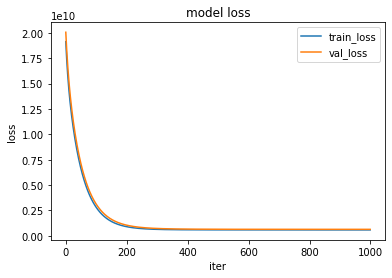

In [17]:
# 可視化
%matplotlib inline
plot_model_loss(reg)

# 【問題8】
## （アドバンス課題）バイアス項の除去
バイアス項θ0を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

# 【問題9】
## （アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

# 【問題10】
## （アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。
$$
\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}[(h_\theta(x^{(i)}) - y^{(i)} )x_{j}^{(i)}]
$$
以下の式から説明をはじめることができます。
$$
\theta_j := \theta_j - \frac{\partial}{\partial \theta_j}J(\theta) \\
$$
目的関数（損失関数）J(θ)は次の式です。
$$
J(\theta)=  \frac{1 }{ 2m}  \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2.
$$

# 【問題11】
## （アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。